##Problem Definition:

The objective of this assignment is to implement the Bag of Visual Words (BOVW) framework for image classification using keypoint detection, feature extraction, feature matching, BOVW formation, and classification techniques. The task involves comparing different keypoint extraction methods (such as SIFT/SURF and ORB) in terms of runtime and classification accuracy.

The steps involved in this assignment include:

**Keypoint Detection:** Detecting distinctive points within the images using keypoint detection methods, such as SIFT or Harris-Laplacian.

**Feature Extraction:** Extracting keypoints using keypoint extraction methods (SIFT/SURF and ORB). This involves obtaining descriptors for the keypoints in the images.

**Feature Matching:** Implementing a feature matching technique based on Euclidean distance to compare and match the keypoints.

**BOVW Formation:** Clustering the features, forming a visual dictionary, and quantizing images based on the visual dictionary. This involves constructing histograms representing the frequency of visual words in each image.

**Classification:** Classifying images using the k-NN approach and evaluating the performance of different visual vocabularies. This includes implementing k-NN with different distance measures (such as Cosine similarity, Chi-square distance) and assessing the impact of varying BOVW histogram sizes, different distance measures, and the choice between SIFT and ORB.

## Importing Requered Libraries

In [ ]:
import numpy as np
import cv2
import os
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time
import seaborn as sns

## plot_images_from_directory Function

This function can be used to display several images from a specific directory. Here's what this function does and how to use it:

### Functionality:
- The `plot_images_from_directory` function is used to display a set of images from a specific directory.
- This function visits subdirectories within a specific directory and shows a certain number of images from each subdirectory.

### Parameters:
- `directory`: The directory where the images are located.
- `target_size`: The target size of the images. It's set to (224, 224) by default.
- `num_images`: The number of images to be displayed from each subdirectory. It's set to 3 by default.

### Example Usage:

- plot_images_from_directory("imagenette2-160/train")

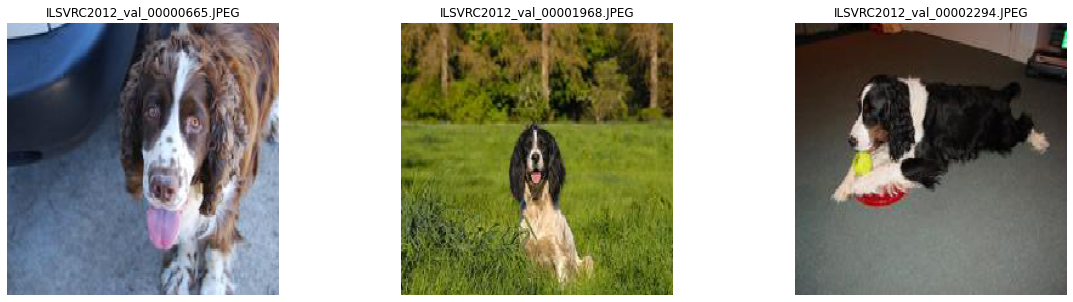

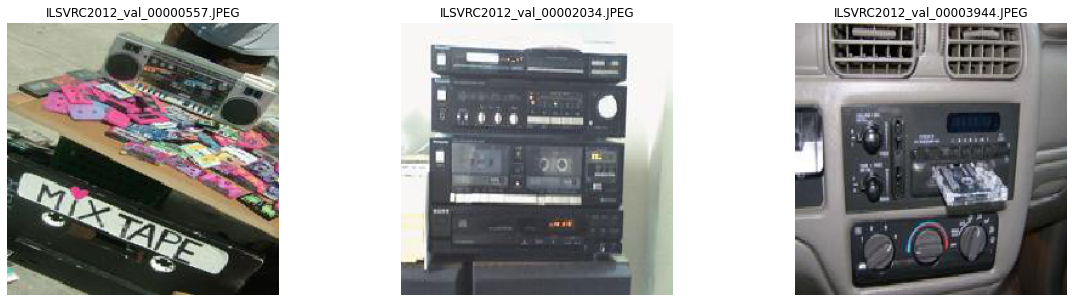

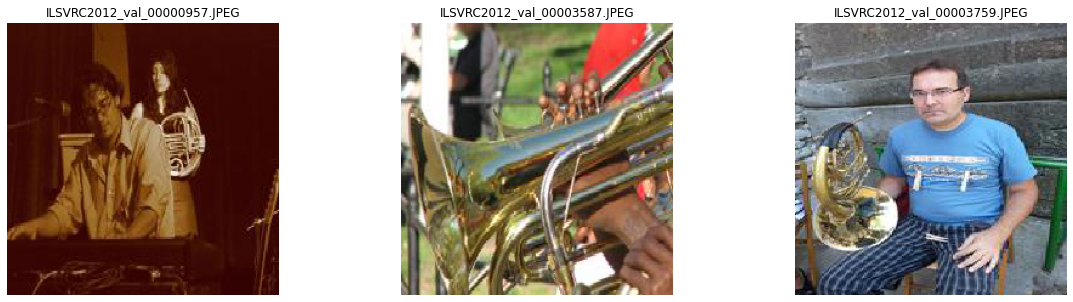

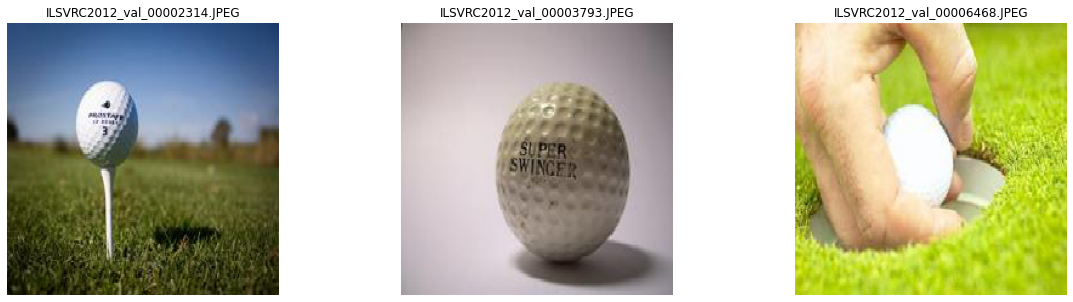

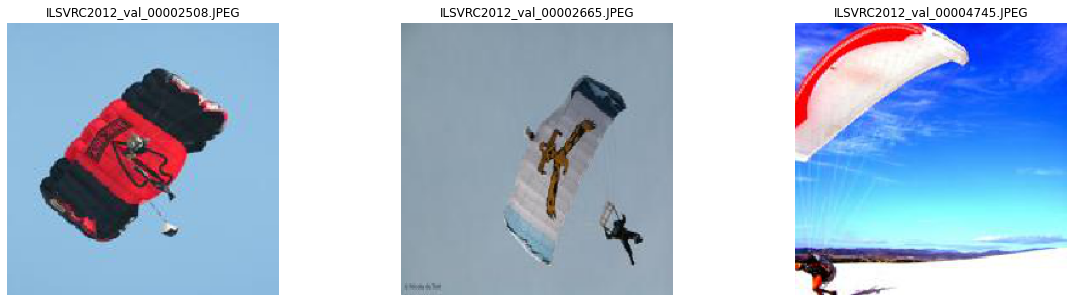

In [ ]:
def plot_images_from_directory(directory, target_size=(224, 224), num_images=3):

    tmp_ = os.listdir(directory)


    for j in tmp_:
        fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
        tmp_dir=directory+"/"+j
        path=os.listdir(tmp_dir)

        for i, image_name in enumerate(path[:num_images]):

            img_path = os.path.join(tmp_dir, image_name)

            img = image.load_img(img_path, target_size=target_size)
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(image_name)

        plt.show()

plot_images_from_directory("imagenette2-160/train")
#plot_images_from_directory('imagenette2-160/val')

## load_images_from_folder Function

This function is designed to load images from a specified folder and organize them into categories based on subdirectories. Here's what this function does and how to use it:

### Functionality:
- The `load_images_from_folder` function loads images from a specified folder.
- It organizes the images into categories based on subdirectories within the specified folder.
- Each category is represented as a list containing the images from the corresponding subdirectory.

### Parameters:
- `folder`: The path to the folder containing the images.

### Example Usage:

- images = load_images_from_folder("imagenette2-160/train")

In [ ]:
def load_images_from_folder(folder):
    images = {}
    for filename in os.listdir(folder):
        category = []
        path = folder + "/" + filename
        for cat in os.listdir(path):
            img = cv2.imread(path + "/" + cat,0)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            if img is not None:
                category.append(img)
        images[filename] = category
    return images




## sift_features Function

This function is responsible for extracting SIFT (Scale-Invariant Feature Transform) features from a set of images. Here's how it meets the specified conditions:

### Keypoint Detection:
- The `sift_features` function utilizes the SIFT method for keypoint detection. SIFT is known for its robustness to scale, rotation, and illumination changes in images, thus satisfying the keypoint detection requirement.

### Feature Extraction:
- In addition to keypoint detection, the `sift_features` function extracts feature vectors using the SIFT method. SIFT generates feature vectors that represent the distribution of gradients in the local neighborhood of keypoints, fulfilling the feature extraction condition.

### Returned Values:
- The function returns a list containing two elements:
  - The first element is a list of all SIFT descriptors extracted from the images.
  - The second element is a dictionary where each key represents a category (image filename or label) and the corresponding value is a list of SIFT descriptors for images in that category.

### Parameters:
- `images`: A dictionary containing images organized by category. Each key represents a category name (e.g., image filename or label), and the corresponding value is a list of images belonging to that category.

### Example Usage:

- sifts = sift_features(images)

In [ ]:
def sift_features(images):
    sift_vectors = {}
    descriptor_list = []
    sift = cv2.SIFT_create()
    for key,value in images.items():
        features = []
        for img in value:
            kp, des = sift.detectAndCompute(img,None)
            if des is not None:
                descriptor_list.extend(des)
                features.append(des)


        sift_vectors[key] = features
    return [descriptor_list, sift_vectors]



## orb_features Function

This function is responsible for extracting ORB (Oriented FAST and Rotated BRIEF) features from a set of images. Here's how it meets the specified conditions:

### Keypoint Detection:
- The `orb_features` function utilizes the ORB method for keypoint detection. ORB is known for its efficiency in detecting keypoints while maintaining accuracy, thus satisfying the keypoint detection requirement.

### Feature Extraction:
- Similar to SIFT, the `orb_features` function extracts feature descriptors using the ORB method. ORB generates binary feature descriptors based on oriented FAST keypoints and rotated BRIEF descriptors, fulfilling the feature extraction condition.

### Returned Values:
- The function returns a list containing two elements:
  - The first element is a list of all ORB descriptors extracted from the images.
  - The second element is a dictionary where each key represents a category (image filename or label) and the corresponding value is a list of ORB descriptors for images in that category.

### Parameters:
- `images`: A dictionary containing images organized by category. Each key represents a category name (e.g., image filename or label), and the corresponding value is a list of images belonging to that category.

### Example Usage:


- orb_features_data = orb_features(images)


In [ ]:
def orb_features(images):
    orb_vectors = {}
    descriptor_list = []
    orb = cv2.ORB_create()
    for key, value in images.items():
        features = []
        for img in value:
            kp, des = orb.detectAndCompute(img, None)
            if des is not None:
                descriptor_list.extend(des)
                features.append(des)
        orb_vectors[key] = features
    return [descriptor_list, orb_vectors]



## kmeans Function

This function is responsible for clustering features to form the Bag of Visual Words (BoW) dictionary. Here's how it fulfills the specified condition:

### BoW Formation:
- The `kmeans` function clusters the features extracted from images using k-means clustering.
- It forms the basis of the BoW dictionary by creating cluster centers (visual words) from the features.
- These cluster centers represent the visual vocabulary used to quantize images and represent them in the BoW model.

### Parameters:
- `k`: The number of clusters to be created, which determines the number of visual words in the BoW dictionary.
- `descriptor_list`: A list containing descriptors extracted from images, which will be used for clustering.

### Returned Value:
- The function returns an array containing the cluster centers, which represent the visual words created through k-means clustering.

### Example Usage:

- visual_words = kmeans(150, descriptor_list)

In [ ]:
def kmeans(k, descriptor_list):
    kmeans = KMeans(n_clusters = k, n_init=10)
    kmeans.fit(descriptor_list)
    visual_words = kmeans.cluster_centers_
    return visual_words



## find_best_k Function

This function is responsible for finding the best value of k (number of clusters) for K-Means clustering based on the silhouette score. Here's how it works:

### Input Parameters:
- `features`: Feature vectors extracted from images.
- `k_Mean_values`: A list of candidate values for k.

### Procedure:
1. The function iterates through each value of k in the provided list `k_Mean_values`.
2. For each value of k, K-Means clustering is performed on the feature vectors.
3. The silhouette score is calculated using the `silhouette_score` function from scikit-learn.
4. The silhouette score for the current value of k is printed.
5. If the silhouette score for the current value of k is higher than the previous best score, the current value of k becomes the new best k value.

### Output:
- The function returns the best value of k, which corresponds to the highest silhouette score achieved during the iteration.

### Example Usage:

- best_k = find_best_k(features, k_Mean_values)


In [ ]:
def find_best_k(features, k_Mean_values):
    best_k = 0
    best_score = -1
    for k in k_Mean_values:

        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(features)
        silhouette_avg = silhouette_score(features, cluster_labels)
        print("For k =", k, "Silhouette Score is :", silhouette_avg)

        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_k = k
    return best_k




## image_class Function

This function is responsible for assigning images to their corresponding visual words (clusters) based on the nearest centroid distance. Here's a breakdown of what the function does:

### Purpose:
The `image_class` function processes a set of Bag-of-Visual-Words (BoVW) representations of images and assigns each image to its corresponding visual word based on the nearest centroid distance.

### Input Parameters:
- `all_bovw`: A dictionary containing BoVW representations of images organized by category.
- `centers`: The centroids (visual words) obtained from K-Means clustering.

### Procedure:
1. The function iterates through each category of images in the `all_bovw` dictionary.
2. For each image in the category, it initializes an empty histogram to store the visual word frequencies.
3. For each feature vector in the image's BoVW representation:
   - It calculates the distance to each centroid (visual word) in the `centers` array using Euclidean distance.
   - It finds the index of the nearest centroid using the `find_index` function.
   - It increments the corresponding bin in the histogram.
4. Once all feature vectors are processed, the histogram represents the BoVW representation of the image.
5. The function stores the histogram for each image in a dictionary, where the keys are category names (e.g., image filenames or labels).

### Output:
- The function returns a dictionary (`dict_feature`) containing histograms of BoVW representations for each image category.

### Example Usage:


- dict_bovw = image_class(all_bovw, centers)

In [ ]:
def find_index(feature, centers):
    distances = np.linalg.norm(feature - centers, axis=1)
    return np.argmin(distances)
def image_class(all_bovw, centers):
    dict_feature = {}
    for key,value in all_bovw.items():
        category = []
        for img in value:
            histogram = np.zeros(len(centers))
            for each_feature in img:
                ind = find_index(each_feature, centers)
                histogram[ind] += 1
            category.append(histogram)
        dict_feature[key] = category
    return dict_feature



## knn_sklearn Function

This function implements the k-nearest neighbors (KNN) classification algorithm using scikit-learn library. Here's a breakdown of what the function does:

### Purpose:
The `knn_sklearn` function performs KNN classification on a given set of training images and their corresponding labels, and evaluates the performance on a set of test images.

### Input Parameters:
- `images`: A dictionary containing images organized by category for training.
- `tests`: A dictionary containing test images organized by category.
- `distance_measure` (optional): The distance measure to be used for computing the distance between data points. Default is 'euclidean'.
- `n_neighbors` (optional): The number of neighbors to consider for classification. Default is 10.

### Procedure:
1. The function extracts feature vectors and labels from the training images (`images`) and organizes them into arrays (`X_train`, `y_train`).
2. Similarly, it extracts feature vectors and labels from the test images (`tests`) and organizes them into arrays (`X_test`, `y_test`).
3. Depending on the specified `distance_measure`, the function creates a KNN classifier model using appropriate settings. Supported distance measures are 'euclidean', 'cosine', and 'manhattan'.
4. The model is trained on the training data using the `fit` method.
5. Prediction is made on the test data using the `predict` method, and the predicted labels are stored in `y_pred`.
6. Classification accuracy, confusion matrix, and runtime are computed based on the predictions and ground truth labels.

### Output:
- The function returns the accuracy score, confusion matrix, and runtime of the classification process.

### Example Usage:

- accuracy, confusion_mat, runtime = knn_sklearn(images, tests, distance_measure='euclidean', n_neighbors=10)

In [ ]:

def knn_sklearn(images, tests, distance_measure='euclidean', n_neighbors=10):
    X_train, y_train = [], []
    for key, value in images.items():
        X_train.extend(value)
        y_train.extend([key]*len(value))
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_test, y_test = [], []
    for key, value in tests.items():
        X_test.extend(value)
        y_test.extend([key]*len(value))
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # KNN sınıflayıcı oluşturma
    if distance_measure == 'euclidean':
        knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    elif distance_measure == 'cosine':
        knn_model = make_pipeline(StandardScaler(), PCA(n_components=2), KNeighborsClassifier(n_neighbors=n_neighbors, metric='cosine'))
    elif distance_measure == 'manhattan':
        knn_model = KNeighborsClassifier(n_neighbors=n_neighbors,metric='manhattan')
    else:
        raise ValueError("Invalid distance measure!")

    knn_model.fit(X_train, y_train)

    start_time = time.time()
    y_pred = knn_model.predict(X_test)
    end_time = time.time()

    accuracy = accuracy_score(y_test, y_pred)

    confusion_mat = confusion_matrix(y_test, y_pred)

    runtime = end_time - start_time

    return accuracy, confusion_mat, runtime



## find_best_k_knn Function

This function is responsible for finding the best value of k (number of neighbors) for the k-nearest neighbors (KNN) classification algorithm based on the provided training and test images. Here's a breakdown of what the function does:

### Purpose:
The `find_best_k_knn` function aims to determine the optimal number of neighbors (k) for KNN classification by evaluating performance metrics such as accuracy, confusion matrix, and runtime for different values of k.

### Input Parameters:
- `images_train`: A dictionary containing training images organized by category.
- `images_test`: A dictionary containing test images organized by category.
- `distance_measure` (optional): The distance measure to be used for computing the distance between data points. Default is 'euclidean'.
- `max_k` (optional): The maximum value of k to be considered. Default is 1000.
- `step` (optional): The step size for iterating over k values. Default is 10.

### Procedure:
1. The function iterates through a range of k values from 10 to `max_k` with a specified step size (`step`).
2. For each value of k, KNN classification is performed on the training and test images using the `knn_sklearn` function.
3. The accuracy, confusion matrix, and runtime are computed for each value of k.
4. The function keeps track of the best performing k value based on the highest accuracy achieved.
5. The confusion matrix for the best k value is plotted using seaborn.
6. The function returns the best k value, corresponding accuracy, confusion matrix, runtime, and a dictionary containing performance metrics for each k value.

### Output:
- The function returns the best k value, accuracy, confusion matrix, runtime, and a dictionary containing performance metrics for each k value.

### Example Usage:

- best_k, best_accuracy, best_confusion_matrix, best_runtime, dict_best_k = find_best_k_knn(images_train, images_test, distance_measure='euclidean', max_k=1000, step=10)


In [ ]:
def find_best_k_knn(images_train, images_test, distance_measure='euclidean', max_k=1000, step=10):
    dict_best_k = {}
    best_accuracy = 0
    best_k = 0
    best_confusion_matrix = None
    best_runtime = 0
    for i in range(10, max_k + 1, step):
        accuracy, confusion_mat, runtime = knn_sklearn(images_train, images_test, distance_measure=distance_measure, n_neighbors=i)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = i
            best_confusion_matrix = confusion_mat
            best_runtime = runtime
        dict_best_k[i] = {'accuracy': accuracy, 'confusion_matrix': confusion_mat, 'runtime': runtime}

    # Plot confusion matrix for best k
    plt.figure(figsize=(10, 8))
    sns.heatmap(best_confusion_matrix, annot=True, cmap="YlGnBu", fmt="d")
    plt.title("Confusion Matrix for Best k (k = {})".format(best_k))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    return best_k, best_accuracy, best_confusion_matrix, best_runtime, dict_best_k




## printer Function

This function is responsible for printing the results of the KNN classification with the best k value. Here's a breakdown of what the function does:

### Purpose:
The `printer` function displays the best k value, accuracy, confusion matrix, and runtime of the KNN classification process.

### Input Parameters:
- `best_k`: The best value of k (number of neighbors) determined during the KNN classification process.
- `best_accuracy`: The accuracy achieved with the best k value.
- `best_confusion_matrix`: The confusion matrix corresponding to the best k value.
- `best_runtime`: The runtime (execution time) of the KNN classification process with the best k value.

### Output:
- The function visually presents the best k value, accuracy, confusion matrix, and runtime.

### Example Usage:

- printer(best_k, best_accuracy, best_confusion_matrix, best_runtime)

In [ ]:
def printer(best_k, best_accuracy, best_confusion_matrix, best_runtime):
    print("Best k:", best_k)
    print("Best accuracy:", best_accuracy)
    plt.figure(figsize=(10, 8))
    sns.heatmap(best_confusion_matrix, annot=True, cmap="YlGnBu", fmt="d")
    plt.title("Confusion Matrix for Best k (k = {})".format(best_k))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    print("Runtime:", best_runtime)
    print("*"*50)



## Loading Data from Folder

In [ ]:
images = load_images_from_folder("imagenette2-160/train")
val = load_images_from_folder("imagenette2-160/val")
len(images["n01440764"])

963

## Image classification using Bag of Visual Words(Using Shift Method)

In [ ]:
#Shift
sifts = sift_features(images)
descriptor_list = sifts[0]
all_bovw_feature = sifts[1]
sifts_Val=sift_features(val)
test_bovw_feature = sifts_Val[1]

In [ ]:
test_bovw_feature


{'n01440764': [array([[ 2.,  3., 17., ...,  2.,  0.,  0.],
         [ 2.,  0.,  0., ...,  2., 10., 33.],
         [44., 26.,  5., ...,  0.,  0.,  0.],
         ...,
         [61., 18., 12., ...,  0.,  0.,  0.],
         [16.,  8.,  0., ...,  6., 47., 70.],
         [ 0.,  1., 32., ...,  0.,  0.,  0.]], dtype=float32),
  array([[23., 14.,  7., ...,  0.,  0.,  3.],
         [10.,  4.,  0., ...,  3., 29., 15.],
         [ 0.,  0.,  4., ...,  0.,  0.,  0.],
         ...,
         [18., 12., 22., ...,  0.,  0.,  0.],
         [ 0.,  0.,  1., ...,  0.,  0.,  0.],
         [36.,  7.,  1., ...,  0.,  0.,  0.]], dtype=float32),
  array([[ 93.,  10.,   1., ...,   0.,   0.,  22.],
         [ 16.,   0.,   0., ...,   7.,   1.,   5.],
         [110., 107.,  32., ...,   0.,   0.,   0.],
         ...,
         [  1.,   1.,   3., ...,   1.,   0.,   0.],
         [ 22.,   4.,   0., ...,   4.,   8.,   2.],
         [ 12.,   4.,  14., ...,   1.,   2.,  10.]], dtype=float32),
  array([[187.,  36.,   2., ..

In [ ]:
descriptor_list

[array([ 31.,   3.,   4.,   3.,   0.,   0.,   0.,  35., 124.,   3.,   2.,
          7.,  30.,  36.,  13., 124.,  29.,  13.,   2.,  18., 111., 124.,
         22.,  40.,  36.,  18.,   4.,   5.,  43.,  55.,  24.,  49.,  55.,
         17.,   0.,   0.,   0.,   0.,   0.,  19., 124.,  36.,   0.,   8.,
         33.,  41.,   6.,  67.,  52.,   6.,   1.,  20., 124., 124.,  33.,
         32.,  87.,   6.,   0.,  17.,  55.,  61.,  25.,  50.,  22.,   5.,
          1.,   0.,   0.,   0.,   4.,  28., 124.,  25.,  14.,  47.,  24.,
          8.,  13., 112.,  35.,  32.,  31., 107.,  58.,  51.,  18.,  16.,
         30.,  18.,   2.,  21.,  83.,  51.,  15.,  29.,   1.,   5.,   4.,
          0.,   0.,   0.,   1.,   3.,  15.,  75.,  46.,  36.,  39.,   1.,
          4.,  19.,  20.,  63.,  44.,  74.,  64.,   4.,   0.,   0.,  28.,
         80.,  36.,  35.,  35.,  15.,   1.,   1.], dtype=float32),
 array([ 50.,  15.,   6.,   8.,   6.,  27.,  26.,  49.,   3.,   4.,  10.,
         71.,  64.,  46.,  29.,   3.,  27.,  

In [ ]:
#k_Mean_values=[5,10,25]
#best_k = find_best_k(descriptor_list,k_Mean_values)
#print("Best k value:", best_k)

In [ ]:
visual_words = kmeans(100, descriptor_list)

In [ ]:
bovw_train = image_class(all_bovw_feature, visual_words)


In [ ]:
#len(bovw_train["n01440764"])

In [ ]:
bovw_test = image_class(test_bovw_feature, visual_words)

Distance Method :  euclidean


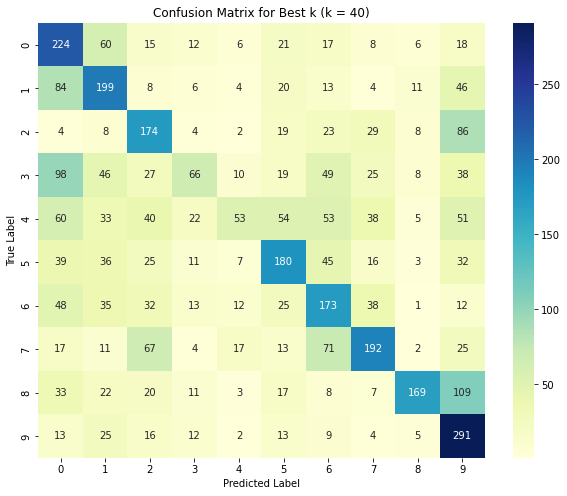

Best k: 40
Best accuracy: 0.4384713375796178


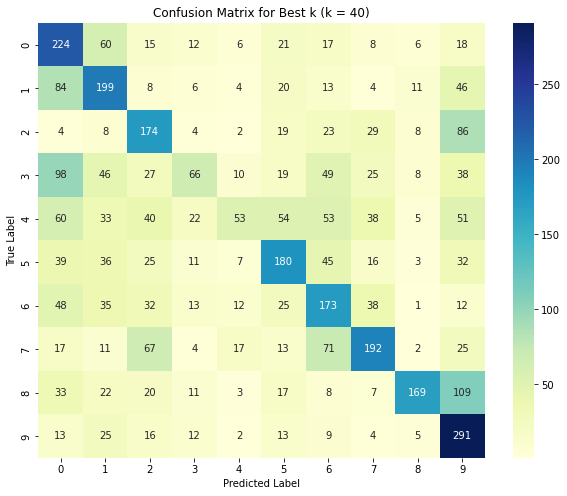

Runtime: 0.23636698722839355
**************************************************
Distance Method :  cosine


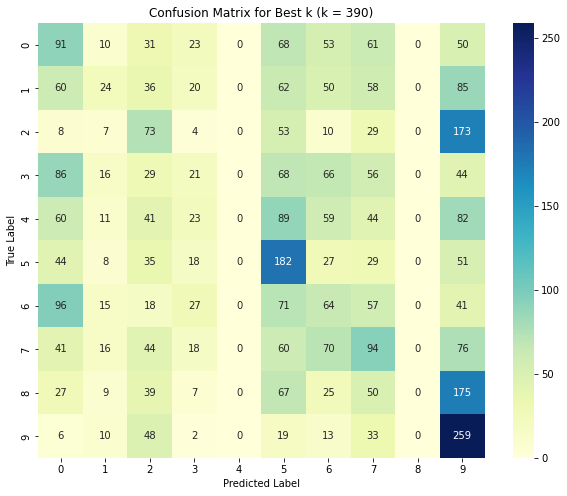

Best k: 390
Best accuracy: 0.20585987261146496


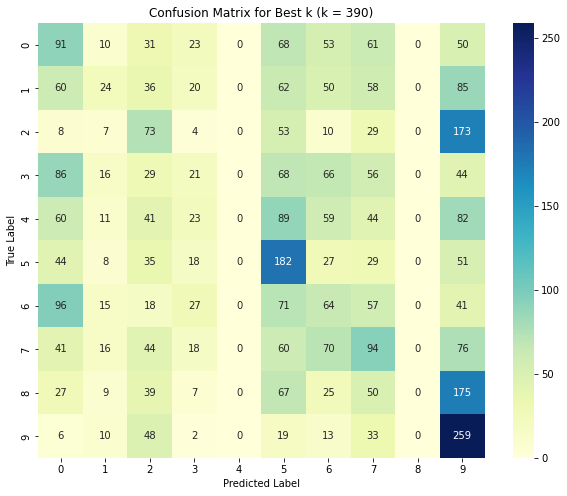

Runtime: 1.100696086883545
**************************************************
Distance Method :  manhattan


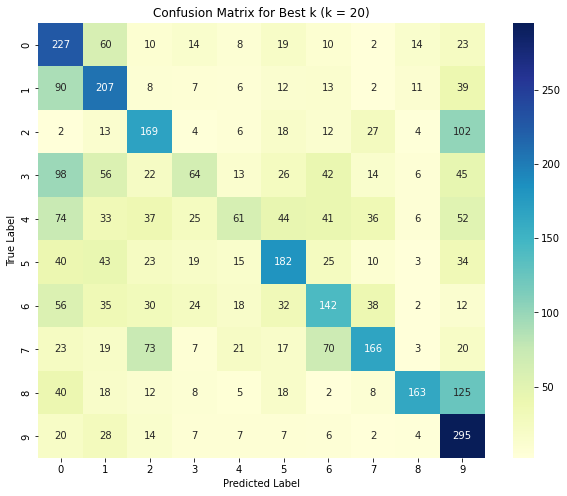

Best k: 20
Best accuracy: 0.4270063694267516


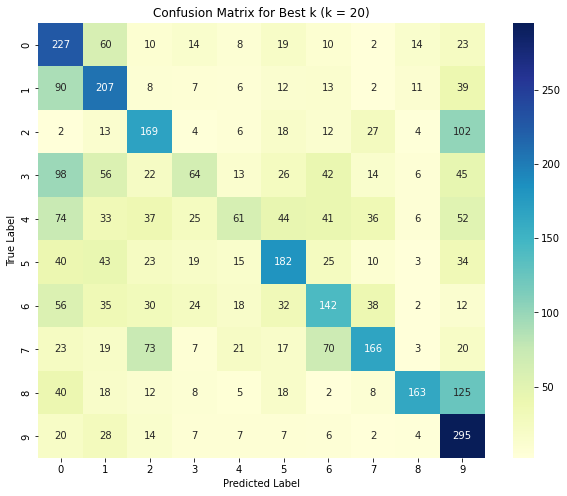

Runtime: 0.8464555740356445
**************************************************


In [ ]:
for dist in ["euclidean","cosine","manhattan"]:
    print("Distance Method : ",dist)
    best_k, best_accuracy, best_confusion_matrix, best_runtime, dict_best_k = find_best_k_knn(bovw_train, bovw_test, distance_measure=dist, max_k=500, step=10)
    printer(best_k, best_accuracy, best_confusion_matrix, best_runtime)

## Image classification using Bag of Visual Words(Using Orb Method)

In [ ]:
#### ORB

orb_features_train = orb_features(images)
descriptor_list_orb_train = orb_features_train[0]
all_bovw_feature_orb_train = orb_features_train[1]

orb_features_test = orb_features(val)
test_bovw_feature_orb = orb_features_test[1]

In [ ]:
test_bovw_feature_orb

{'n01440764': [array([[168, 104, 153, ..., 137, 124, 194],
         [104,  73, 127, ..., 187, 100,  42],
         [ 10, 254, 255, ..., 212, 167, 255],
         ...,
         [ 20, 221,  95, ..., 178, 164,  58],
         [  8, 233, 178, ...,  10, 231, 142],
         [106, 173, 176, ...,  12, 159, 238]], dtype=uint8),
  array([[ 61,  73,  74, ..., 187, 106, 128],
         [141, 124, 151, ..., 117, 169,  18],
         [198, 190, 159, ...,  81, 165,  91],
         ...,
         [ 59, 183,  97, ..., 214, 208, 125],
         [173, 167, 225, ..., 238, 208, 117],
         [157,  21, 251, ..., 224, 211, 117]], dtype=uint8),
  array([[ 87, 225, 131, ...,  38,  63,  70],
         [195, 172,  25, ...,  32,   3, 112],
         [246, 205, 208, ..., 251, 210,   0],
         ...,
         [198, 175, 159, ..., 115, 167, 139],
         [ 74, 148, 148, ..., 124, 141,  94],
         [133, 167,  92, ..., 217, 161, 129]], dtype=uint8),
  array([[108, 164, 156, ...,  64, 198, 226],
         [ 90,   8, 231, .

In [ ]:
descriptor_list_orb_train

[array([120, 249, 177, 174,  13, 204,  23, 252, 238, 205, 168,   9, 182,
        241,  72,  50, 208, 107, 121,  65,  75,  43, 242,  33, 241, 244,
          6,  56,  80,  10, 151, 106], dtype=uint8),
 array([ 82,  56, 154, 242,  43, 244,  16,  87, 171, 159, 172,   8,  46,
        183,  97, 186, 135,  59, 253,  16,  15,  75, 178, 224, 147, 209,
         94,  59, 192,  80,  47,  59], dtype=uint8),
 array([ 60, 241, 123, 226, 159, 217,  18,  65, 143, 161, 173,  10,  15,
        157, 108, 176, 170, 179, 223,  82,  95,  41,  56, 244, 251, 213,
         21, 115,  99,  10, 140, 114], dtype=uint8),
 array([124,  56,  14,  49,  13, 234, 177,   2, 164, 224, 230,  13, 147,
         25,   3,  90,  40, 228, 233,  81,   9, 248, 209,  32, 205, 161,
          0,  81, 233,  41,  94,  18], dtype=uint8),
 array([127, 148, 156,  40, 185,  87,  87, 185, 135, 242, 141,  13,  94,
        119,  75, 114, 213, 193, 248,  54, 205,  67, 123,  30, 251,  95,
         69,  63, 154, 246,   8,  87], dtype=uint8),
 arra

In [ ]:
#k_Mean_values=[5,10,25,50,75,100]
#best_k_orb = find_best_k(descriptor_list_orb_train,k_Mean_values)
#print("Best k value:", best_k)


In [ ]:
visual_words_orb = kmeans(100, descriptor_list_orb_train)


In [ ]:
bovw_train = image_class(all_bovw_feature_orb_train, visual_words_orb)


In [ ]:
bovw_test = image_class(test_bovw_feature_orb, visual_words_orb)

Distance Method :  euclidean


Best k: 410
Best accuracy: 0.30929936305732486


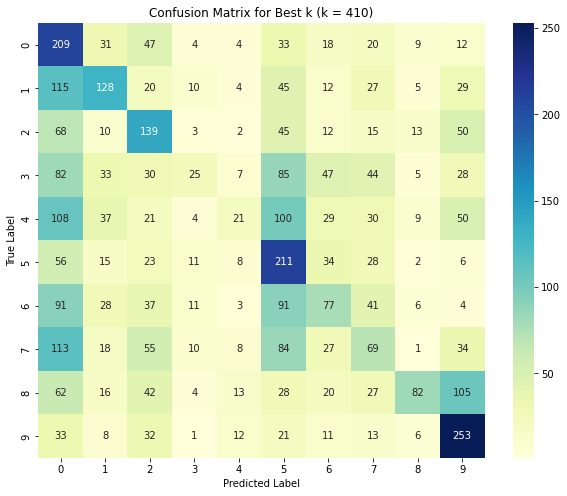

Runtime: 0.5704727172851562
**************************************************
Distance Method :  cosine


Best k: 350
Best accuracy: 0.19388535031847134


Runtime: 1.0728473663330078
**************************************************
Distance Method :  manhattan


Best k: 90
Best accuracy: 0.3024203821656051


Runtime: 0.9672935009002686
**************************************************


In [ ]:
for dist in ["euclidean","cosine","manhattan"]:
    print("Distance Method : ",dist)
    best_k, best_accuracy, best_confusion_matrix, best_runtime, dict_best_k = find_best_k_knn(bovw_train, bovw_test, distance_measure=dist, max_k=500, step=10)
    printer(best_k, best_accuracy, best_confusion_matrix, best_runtime)

The choice of distance measure significantly affects the classification accuracy and runtime. Euclidean distance generally yields better results compared to Cosine similarity and Manhattan distance.

Cosine similarity tends to perform poorly in this context, possibly due to the nature of feature vectors and the high dimensionality of the data.

Increasing the number of neighbors (k) can sometimes lead to overfitting or underfitting, as seen in fluctuations of accuracy with varying k values. Therefore, careful selection of k is crucial to achieving optimal performance.

In order to increase the accuracy; besides all these internal variables, selecting more qualified input images (in terms of resolution etc.) and generating more synthetic data should increase the accuracy.

